In [46]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import MultiPolygon, LineString, Polygon
from datetime import date, datetime
import folium

pd.options.display.max_columns = None

# Reading from combined file

In [2]:
confirmed_fires = pd.read_csv('../data/confirmed_fires.csv').drop(['number', 'street', 'st_type', 'st_suffix', 'addr_2', 'apt_room', 'xst_prefix', 'xstreet', 'xst_type', 'xst_suffix'], 
    axis=1)

In [3]:
fires_gdf = gpd.GeoDataFrame(confirmed_fires, geometry=gpd.points_from_xy(confirmed_fires.longitude, confirmed_fires.latitude), crs='EPSG:4326')
fires_gdf.head()

FID     inci_no                                           descript  \
0  NaN  0026882     Dumpster or other outside trash receptacle fir...   
1  NaN  0026886     Dumpster or other outside trash receptacle fir...   
2  NaN  0027005     Outside rubbish, trash or waste fire          ...   
3  NaN  0027024     Outside rubbish, trash or waste fire          ...   
4  NaN  0027067     Excessive heat, scorch burns with no ignition ...   

     alm_date station inci_type    clr_date  alarms  complete  confirmed_fire  \
0  2016/08/02     21        154  2016/08/02       1         1            True   
1  2016/08/02     06        154  2016/08/02       1         1            True   
2  2016/08/02     07        151  2016/08/02       1         1            True   
3  2016/08/03     05        151  2016/08/03       1         1            True   
4  2016/08/03     21        251  2016/08/03       1         1            True   

        alarm_datetime       clear_datetime   latitude  longitude  \
0  2016-08-02 05:44:50  2016-08-02 06:20:14        NaN        NaN   
1  2016-08-02 06:16:10  2016-08-02 06:33:03  44.962750 -93.305485   
2  2016-08-02 22:41:07  2016-08-02 22:56:13  44.961700 -93.261202   
3  2016-08-03 01:09:16  2016-08-03 01:19:09  44.891355 -93.246812   
4  2016-08-03 11:37:01  2016-08-03 14:39:18        NaN        NaN   

                     geometry  
0                 POINT EMPTY  
1  POINT (-93.30549 44.96275)  
2  POINT (-93.26120 44.96170)  
3  POINT (-93.24681 44.89135)  
4                 POINT EMPTY

In [4]:
fires_gdf.drop(['latitude', 'longitude'], axis=1, inplace=True)

In [5]:
fires_gdf.head()

FID     inci_no                                           descript  \
0  NaN  0026882     Dumpster or other outside trash receptacle fir...   
1  NaN  0026886     Dumpster or other outside trash receptacle fir...   
2  NaN  0027005     Outside rubbish, trash or waste fire          ...   
3  NaN  0027024     Outside rubbish, trash or waste fire          ...   
4  NaN  0027067     Excessive heat, scorch burns with no ignition ...   

     alm_date station inci_type    clr_date  alarms  complete  confirmed_fire  \
0  2016/08/02     21        154  2016/08/02       1         1            True   
1  2016/08/02     06        154  2016/08/02       1         1            True   
2  2016/08/02     07        151  2016/08/02       1         1            True   
3  2016/08/03     05        151  2016/08/03       1         1            True   
4  2016/08/03     21        251  2016/08/03       1         1            True   

        alarm_datetime       clear_datetime                    geometry  
0  2016-08-02 05:44:50  2016-08-02 06:20:14                 POINT EMPTY  
1  2016-08-02 06:16:10  2016-08-02 06:33:03  POINT (-93.30549 44.96275)  
2  2016-08-02 22:41:07  2016-08-02 22:56:13  POINT (-93.26120 44.96170)  
3  2016-08-03 01:09:16  2016-08-03 01:19:09  POINT (-93.24681 44.89135)  
4  2016-08-03 11:37:01  2016-08-03 14:39:18                 POINT EMPTY

In [6]:
fires_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 49525 entries, 0 to 49524
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   FID             42081 non-null  float64 
 1   inci_no         49525 non-null  object  
 2   descript        49525 non-null  object  
 3   alm_date        49525 non-null  object  
 4   station         49525 non-null  object  
 5   inci_type       49525 non-null  object  
 6   clr_date        49525 non-null  object  
 7   alarms          49525 non-null  int64   
 8   complete        49525 non-null  int64   
 9   confirmed_fire  49525 non-null  bool    
 10  alarm_datetime  49525 non-null  object  
 11  clear_datetime  49525 non-null  object  
 12  geometry        49525 non-null  geometry
dtypes: bool(1), float64(1), geometry(1), int64(2), object(8)
memory usage: 4.6+ MB


In [7]:
min_date = date(2020, 1, 1)
max_date = date(2020, 12, 31)
# df.loc[min_date <= df.alarm_datetime.dt.date <= max_date]

In [8]:
min_date

datetime.date(2020, 1, 1)

In [9]:
max_date

datetime.date(2020, 12, 31)

In [10]:
fires_gdf.alarm_datetime

0        2016-08-02 05:44:50
1        2016-08-02 06:16:10
2        2016-08-02 22:41:07
3        2016-08-03 01:09:16
4        2016-08-03 11:37:01
                ...         
49520    2022-04-18 10:31:57
49521    2022-04-19 09:02:55
49522    2022-04-19 11:49:26
49523    2022-04-19 12:31:35
49524    2022-04-20 10:21:29
Name: alarm_datetime, Length: 49525, dtype: object

In [11]:
fires_gdf['alarm_datetime'] = pd.to_datetime(fires_gdf.alarm_datetime)

In [12]:
df = fires_gdf
year_choice = 2020
fires_gdf.loc[fires_gdf.alarm_datetime.dt.year == year_choice].alarm_datetime.min().date()

datetime.date(2020, 1, 1)

In [13]:
max_date.strftime('%B %d, %Y')

'December 31, 2020'

In [14]:
def filter_fires(df, min_date, max_date):
    df = df.rename(columns={'station':'station_from_fires'})[['station_from_fires', 'alarm_datetime', 'clear_datetime', 'geometry']]
    df['alarm_datetime'] = pd.to_datetime(df['alarm_datetime'])
    df['clear_datetime'] = pd.to_datetime(df['clear_datetime'])

    date_mask = (min_date <= fires_gdf.alarm_datetime.dt.date) & (fires_gdf.alarm_datetime.dt.date <= max_date)

    return df.loc[date_mask][['station_from_fires', 'geometry']]

In [15]:
filter_fires(fires_gdf, date(2012, 1, 1), date(2022, 4, 22))

station_from_fires                    geometry
0                    21                  POINT EMPTY
1                    06   POINT (-93.30549 44.96275)
2                    07   POINT (-93.26120 44.96170)
3                    05   POINT (-93.24681 44.89135)
4                    21                  POINT EMPTY
...                  ...                         ...
49520                14   POINT (-93.30831 45.02228)
49521                17   POINT (-93.27273 44.93388)
49522                14   POINT (-93.29562 45.02236)
49523                04   POINT (-93.29139 44.99917)
49524                19   POINT (-93.21762 44.97322)

[49525 rows x 2 columns]

# Working on map areas

In [16]:
districts = gpd.read_file('../data/Fire_Districts.geojson')
districts = districts.drop(['SHAPE_Length', 'SHAPE_Area'], axis=1).rename(columns={'DISTRICT':'District'})
districts

FID District                                           geometry
0    1        1  MULTIPOLYGON (((-93.26367 44.98413, -93.26312 ...
1    2        2  MULTIPOLYGON (((-93.30455 44.96643, -93.30375 ...
2    3        3  MULTIPOLYGON (((-93.24455 44.97807, -93.24436 ...
3    4        4  MULTIPOLYGON (((-93.31950 45.05125, -93.31741 ...
4    5        5  MULTIPOLYGON (((-93.25916 44.98427, -93.25934 ...
5    6        5  MULTIPOLYGON (((-93.27726 45.03657, -93.27726 ...

In [17]:
districts.explore('District', cmap='Dark2')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [18]:
station_areas = gpd.read_file('../data/Fire_Stations_Areas.geojson')
station_areas = station_areas.rename(columns={'STATION':'Station'})[['Station', 'geometry']]
station_areas

Station                                           geometry
0        1  POLYGON ((-93.26367 44.98413, -93.26312 44.983...
1       11  POLYGON ((-93.25916 44.98427, -93.25934 44.984...
2       11  POLYGON ((-93.24532 45.00237, -93.24499 45.002...
3       12  POLYGON ((-93.23324 44.92330, -93.23319 44.923...
4       14  POLYGON ((-93.31483 45.02952, -93.31355 45.029...
5       15  POLYGON ((-93.22690 45.02773, -93.22688 45.025...
6       16  POLYGON ((-93.30444 44.99742, -93.30444 44.996...
7       17  POLYGON ((-93.26647 44.94667, -93.26645 44.945...
8       19  POLYGON ((-93.21516 44.98977, -93.21520 44.987...
9        2  POLYGON ((-93.27726 45.03657, -93.27726 45.035...
10      20  POLYGON ((-93.28292 45.05112, -93.28289 45.051...
11      21  POLYGON ((-93.20515 44.95037, -93.20493 44.950...
12      22  POLYGON ((-93.30455 44.96643, -93.30375 44.966...
13      27  POLYGON ((-93.27471 44.92147, -93.27472 44.919...
14      28  POLYGON ((-93.30812 44.93049, -93.30804 44.930...
15       4  POLYGON ((-93.27510 45.00591, -93.27511 45.005...
16       5  POLYGON ((-93.24984 44.96093, -93.24986 44.959...
17       6  POLYGON ((-93.27034 44.97478, -93.26898 44.974...
18       7  POLYGON ((-93.24455 44.97807, -93.24436 44.977...
19       8  POLYGON ((-93.29692 44.96092, -93.29565 44.960...

In [19]:
station_areas.explore('Station')

In [21]:
station_areas

Station                                           geometry
0        1  POLYGON ((-93.26367 44.98413, -93.26312 44.983...
1       11  POLYGON ((-93.25916 44.98427, -93.25934 44.984...
2       11  POLYGON ((-93.24532 45.00237, -93.24499 45.002...
3       12  POLYGON ((-93.23324 44.92330, -93.23319 44.923...
4       14  POLYGON ((-93.31483 45.02952, -93.31355 45.029...
5       15  POLYGON ((-93.22690 45.02773, -93.22688 45.025...
6       16  POLYGON ((-93.30444 44.99742, -93.30444 44.996...
7       17  POLYGON ((-93.26647 44.94667, -93.26645 44.945...
8       19  POLYGON ((-93.21516 44.98977, -93.21520 44.987...
9        2  POLYGON ((-93.27726 45.03657, -93.27726 45.035...
10      20  POLYGON ((-93.28292 45.05112, -93.28289 45.051...
11      21  POLYGON ((-93.20515 44.95037, -93.20493 44.950...
12      22  POLYGON ((-93.30455 44.96643, -93.30375 44.966...
13      27  POLYGON ((-93.27471 44.92147, -93.27472 44.919...
14      28  POLYGON ((-93.30812 44.93049, -93.30804 44.930...
15       4  POLYGON ((-93.27510 45.00591, -93.27511 45.005...
16       5  POLYGON ((-93.24984 44.96093, -93.24986 44.959...
17       6  POLYGON ((-93.27034 44.97478, -93.26898 44.974...
18       7  POLYGON ((-93.24455 44.97807, -93.24436 44.977...
19       8  POLYGON ((-93.29692 44.96092, -93.29565 44.960...

In [22]:
districts

FID District                                           geometry
0    1        1  MULTIPOLYGON (((-93.26367 44.98413, -93.26312 ...
1    2        2  MULTIPOLYGON (((-93.30455 44.96643, -93.30375 ...
2    3        3  MULTIPOLYGON (((-93.24455 44.97807, -93.24436 ...
3    4        4  MULTIPOLYGON (((-93.31950 45.05125, -93.31741 ...
4    5        5  MULTIPOLYGON (((-93.25916 44.98427, -93.25934 ...
5    6        5  MULTIPOLYGON (((-93.27726 45.03657, -93.27726 ...

In [23]:
gpd.overlay(station_areas, districts).explore('District', cmap='Dark2')
# station_areas.explore()

In [24]:
nhoods = gpd.read_file('../data/Minneapolis_Neighborhoods.geojson')
nhoods = nhoods.rename(columns={'SYMBOL_NAM':'symbol_name', 'BDNAME':'nhood', 'BDNUM':'BDnum'})[['symbol_name', 'nhood', 'BDnum', 'geometry']]
nhoods

symbol_name              nhood BDnum  \
0     WARDAREA      Phillips West    90   
1     WARDAREA      Downtown West    87   
2     WARDAREA      Downtown East    88   
3     WARDAREA    Ventura Village    89   
4     WARDAREA  Sumner - Glenwood    29   
..         ...                ...   ...   
82    WARDAREA   Marshall Terrace    13   
83    WARDAREA           Whittier    51   
84    WARDAREA            Lyndale    53   
85    WARDAREA  East Bde Maka Ska    46   
86    WARDAREA      West Maka Ska    49   

                                             geometry  
0   MULTIPOLYGON (((-93.26258 44.96091, -93.26258 ...  
1   MULTIPOLYGON (((-93.26011 44.98300, -93.26010 ...  
2   MULTIPOLYGON (((-93.24499 44.97893, -93.24499 ...  
3   MULTIPOLYGON (((-93.24958 44.96630, -93.24951 ...  
4   MULTIPOLYGON (((-93.28830 44.98904, -93.28830 ...  
..                                                ...  
82  MULTIPOLYGON (((-93.27792 45.02761, -93.27768 ...  
83  MULTIPOLYGON (((-93.26954 44.96269, -93.26954 ...  
84  MULTIPOLYGON (((-93.28429 44.94836, -93.28302 ...  
85  MULTIPOLYGON (((-93.30211 44.94837, -93.30083 ...  
86  MULTIPOLYGON (((-93.32671 44.94845, -93.32628 ...  

[87 rows x 4 columns]

In [25]:
station_districts = gpd.overlay(station_areas, districts)
station_districts.head()

Station  FID District                                           geometry
0       1    1        1  POLYGON ((-93.26312 44.98370, -93.26286 44.983...
1      16    1        1  MULTIPOLYGON (((-93.27365 44.97880, -93.27480 ...
2      17    1        1  MULTIPOLYGON (((-93.26774 44.94667, -93.26758 ...
3      22    1        1  MULTIPOLYGON (((-93.29575 44.94837, -93.29575 ...
4       4    1        1  MULTIPOLYGON (((-93.26473 44.98494, -93.26473 ...

In [26]:
def fix_geometry_collection(geom):
    if geom.geom_type == 'GeometryCollection':
        multi_list = []

        for thing in geom:
            if thing.geom_type == 'Polygon':
                multi_list.append(thing)

        return MultiPolygon(multi_list)
    else:
        return geom

In [27]:
nhood_districts = gpd.overlay(nhoods, station_districts, keep_geom_type=False)
nhood_districts.head()

symbol_name            nhood BDnum Station  FID District  \
0    WARDAREA    Phillips West    90       5    1        1   
1    WARDAREA          Central    54       5    1        1   
2    WARDAREA    Phillips West    90       6    1        1   
3    WARDAREA    Downtown West    87       6    1        1   
4    WARDAREA  Ventura Village    89       6    1        1   

                                            geometry  
0  MULTIPOLYGON (((-93.26405 44.95375, -93.26388 ...  
1  POLYGON ((-93.26392 44.94667, -93.26502 44.946...  
2  POLYGON ((-93.26920 44.96090, -93.26898 44.960...  
3  POLYGON ((-93.26921 44.96995, -93.26921 44.969...  
4  POLYGON ((-93.26512 44.96091, -93.26512 44.960...

In [28]:
nhood_districts['geometry'] = nhood_districts.geometry.apply(fix_geometry_collection)

/var/folders/t5/94fnr22503dcqpv7wwblhy140000gp/T/ipykernel_58199/2309019409.py:5: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for thing in geom:


In [29]:
nhood_districts.explore('District',
     cmap='Dark2',
     tooltip = ['nhood', 'Station', 'District'])

In [30]:
nhood_districts

symbol_name                        nhood BDnum Station  FID District  \
0      WARDAREA                Phillips West    90       5    1        1   
1      WARDAREA                      Central    54       5    1        1   
2      WARDAREA                Phillips West    90       6    1        1   
3      WARDAREA                Downtown West    87       6    1        1   
4      WARDAREA              Ventura Village    89       6    1        1   
..          ...                          ...   ...     ...  ...      ...   
245    WARDAREA                   Lowry Hill    43       6    2        2   
246    WARDAREA                   East Isles    44       6    2        2   
247    WARDAREA                      Central    54       5    2        2   
248    WARDAREA              Powderhorn Park    55       5    2        2   
249    WARDAREA  Nicollet Island - East Bank    34      11    5        5   

                                              geometry  
0    MULTIPOLYGON (((-93.26405 44.95375, -93.26388 ...  
1    POLYGON ((-93.26392 44.94667, -93.26502 44.946...  
2    POLYGON ((-93.26920 44.96090, -93.26898 44.960...  
3    POLYGON ((-93.26921 44.96995, -93.26921 44.969...  
4    POLYGON ((-93.26512 44.96091, -93.26512 44.960...  
..                                                 ...  
245  MULTIPOLYGON (((-93.30212 44.96093, -93.30212 ...  
246  POLYGON ((-93.30212 44.96093, -93.30210 44.960...  
247  MULTIPOLYGON (((-93.26517 44.94498, -93.26517 ...  
248  MULTIPOLYGON (((-93.24986 44.93773, -93.24863 ...  
249  POLYGON ((-93.25980 44.98429, -93.26002 44.984...  

[250 rows x 7 columns]

In [31]:
districts

FID District                                           geometry
0    1        1  MULTIPOLYGON (((-93.26367 44.98413, -93.26312 ...
1    2        2  MULTIPOLYGON (((-93.30455 44.96643, -93.30375 ...
2    3        3  MULTIPOLYGON (((-93.24455 44.97807, -93.24436 ...
3    4        4  MULTIPOLYGON (((-93.31950 45.05125, -93.31741 ...
4    5        5  MULTIPOLYGON (((-93.25916 44.98427, -93.25934 ...
5    6        5  MULTIPOLYGON (((-93.27726 45.03657, -93.27726 ...

In [32]:
filtered_fires = filter_fires(fires_gdf, date(2012, 1, 1), date(2022, 4, 22))

gpd.sjoin(districts, filtered_fires).groupby('District')['District'].count()

District
1    12139
2     6607
3     9947
4    13938
5     6687
Name: District, dtype: int64

In [33]:
def get_counts(filtered_fires, areas, area_type='District'):
    gdf = gpd.sjoin(areas, filtered_fires)

    counts = gdf.groupby(area_type)[area_type].count()
    counts = pd.DataFrame(counts).rename(columns={area_type:'num_of_fires'}).reset_index()
    return counts

In [34]:
districts.merge(get_counts(filtered_fires, districts), on='District')

FID District                                           geometry  \
0    1        1  MULTIPOLYGON (((-93.26367 44.98413, -93.26312 ...   
1    2        2  MULTIPOLYGON (((-93.30455 44.96643, -93.30375 ...   
2    3        3  MULTIPOLYGON (((-93.24455 44.97807, -93.24436 ...   
3    4        4  MULTIPOLYGON (((-93.31950 45.05125, -93.31741 ...   
4    5        5  MULTIPOLYGON (((-93.25916 44.98427, -93.25934 ...   
5    6        5  MULTIPOLYGON (((-93.27726 45.03657, -93.27726 ...   

   num_of_fires  
0         12139  
1          6607  
2          9947  
3         13938  
4          6687  
5          6687

In [49]:
def get_point(geometry):
    if geometry.geom_type == 'Polygon':
        return LineString(list(geometry.exterior.coords[0:2]))
    if geometry.geom_type == 'MultiPolygon':
        return LineString(list(Polygon(geometry.geoms[0]).exterior.coords[0:2]))
    return geometry

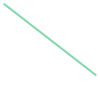

In [50]:
get_point(districts.geometry.iloc[0])

In [60]:
zero_holder = {'geometry':[get_point(nhood_districts.geometry.iloc[0])],
'num_of_fires':[0]}

pd.concat([nhood_districts, pd.DataFrame(zero_holder)], ignore_index=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


symbol_name                        nhood BDnum Station  FID District  \
0      WARDAREA                Phillips West    90       5  1.0        1   
1      WARDAREA                      Central    54       5  1.0        1   
2      WARDAREA                Phillips West    90       6  1.0        1   
3      WARDAREA                Downtown West    87       6  1.0        1   
4      WARDAREA              Ventura Village    89       6  1.0        1   
..          ...                          ...   ...     ...  ...      ...   
246    WARDAREA                   East Isles    44       6  2.0        2   
247    WARDAREA                      Central    54       5  2.0        2   
248    WARDAREA              Powderhorn Park    55       5  2.0        2   
249    WARDAREA  Nicollet Island - East Bank    34      11  5.0        5   
250         NaN                          NaN   NaN     NaN  NaN      NaN   

                                              geometry  num_of_fires  
0    MULTIPOLYGON (((-93.26405 44.95375, -93.26388 ...           NaN  
1    POLYGON ((-93.26392 44.94667, -93.26502 44.946...           NaN  
2    POLYGON ((-93.26920 44.96090, -93.26898 44.960...           NaN  
3    POLYGON ((-93.26921 44.96995, -93.26921 44.969...           NaN  
4    POLYGON ((-93.26512 44.96091, -93.26512 44.960...           NaN  
..                                                 ...           ...  
246  POLYGON ((-93.30212 44.96093, -93.30210 44.960...           NaN  
247  MULTIPOLYGON (((-93.26517 44.94498, -93.26517 ...           NaN  
248  MULTIPOLYGON (((-93.24986 44.93773, -93.24863 ...           NaN  
249  POLYGON ((-93.25980 44.98429, -93.26002 44.984...           NaN  
250  LINESTRING (-93.26405 44.95375, -93.26388 44.9...           0.0  

[251 rows x 8 columns]

In [63]:
def map_fire_counts(filtered_fires, areas, area_type='District'):
    areas_with_counts = areas.merge(get_counts(filtered_fires, areas, area_type), on=area_type)

    if area_type == 'District':
        tooltip_fields = ['District', 'num_of_fires']
        tooltip_aliases = ['District:', 'Number of Fires:']
    elif area_type == 'Station':
        tooltip_fields = ['Station', 'District', 'num_of_fires']
        tooltip_aliases = ['Station:', 'District:', 'Number of Fires:']
    elif area_type == 'nhood':
        tooltip_fields = ['nhood', 'Station', 'District', 'num_of_fires']
        tooltip_aliases = ['Neighborhood:', 'Station:', 'District:', 'Number of Fires:']

    zero_holder = {area_type:'zero_holder',
        'geometry':[get_point(areas_with_counts.geometry.iloc[0])], 
        'num_of_fires':[0]}
    areas_with_counts = pd.concat([areas_with_counts, gpd.GeoDataFrame(zero_holder)], ignore_index=True)

    m = folium.Map(location=[44.986656, -93.258133], zoom_start=12)

    # colormap = cm.LinearColormap(colors=['yellow', 'orange','red'], index=[0,max_fires],vmin=0,vmax=max_fires)

    folium.Choropleth(
        geo_data = areas_with_counts,
        data = areas_with_counts,
        columns=[area_type, 'num_of_fires'],
        key_on=f'feature.properties.{area_type}',
        fill_color='YlOrRd'
        ).add_to(m)

    areas = folium.GeoJson(
        areas_with_counts,
        style_function = lambda feature: {
            # 'fillColor': colormap(feature['properties']['num_of_fires']),
            'fillOpacity': 0,
            'weight': 0
        }
        )
    areas.add_child(
        folium.features.GeoJsonTooltip(
            fields = tooltip_fields,
            aliases = tooltip_aliases
        )
    )

    areas.add_to(m)

    # c = plt.colorbar()
    # plt.clim(0, areas_with_counts['num_of_fires'].max())

    return m

In [64]:
map_fire_counts(filtered_fires, districts, 'District')

In [65]:
map_fire_counts(filtered_fires, station_districts, 'Station')

In [66]:
map_fire_counts(filtered_fires, nhood_districts, 'nhood')